In [1]:
import numpy as np
import pandas as pd
import plotly as px
import plotly.subplots

In [2]:
# Входные данные

t = [885.94, 1158.75, 1970.39, 1578.06, 606.81, 905.01, 975.73, 1614.98, 469.01, 1348.99, 713.97, 755.88, 955.48, 1055.46, 5034.05, 849.04, 1036.09, 1043.65, 636.56, 5061.50, 854.15, 886.33, 1365.50, 1159.35, 578.17, 545.06, 1051.65, 670.44, 763.87, 1404.58, 185.08, 1113.10, 595.81, 1540.19, 895.95, 904.33, 887.07, 1690.58, 1113.17, 854.15, 850.86, 510.07, 1508.87, 504.70, 1167.59, 1397.53, 754.79, 975.05, 1181.60, 1940.53, 541.53, 719.99, 463.15, 746.97, 595.65, 1015.45, 850.51, 958.87, 1509.10, 1059.90, 1357.79, 6.14, 544.16, 1105.84, 709.17, 1505.94, 583.05, 1855.48, 1579.56, 1451.34, 999.74, 654.44, 766.74, 810.88, 1507.14, 1136.50, 784.95, 165.84, 1515.33, 1979.03, 1575.85, 744.76, 850.97, 1415.55, 1544.80, 519.55, 511.58, 701.75, 1594.61, 1005.73, 1043.73, 5.10, 849.01, 1506.55, 464.47, 1851.90, 1198.61, 645.96, 658.77, 875.56]

t.sort()

df = pd.DataFrame(data = t, columns = ['t'])

print('Initial data:\n', df)

Initial data:
           t
0      5.10
1      6.14
2    165.84
3    185.08
4    463.15
..      ...
95  1940.53
96  1970.39
97  1979.03
98  5034.05
99  5061.50

[100 rows x 1 columns]


In [3]:
# Проверим на выбросы
df['t'].describe()

count     100.000000
mean     1075.504600
std       712.966708
min         5.100000
25%       707.315000
50%       930.245000
75%      1373.507500
max      5061.500000
Name: t, dtype: float64

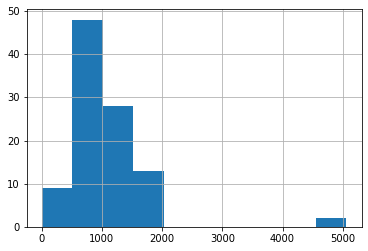

In [4]:
df['t'].hist()

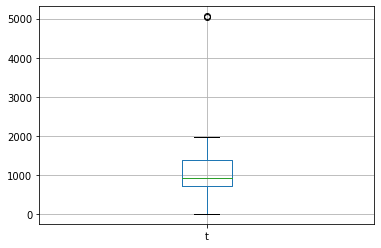

In [5]:
df.boxplot(column = 't')

In [6]:
# Удаление выбросов
df = df.drop(df[df['t'] > 3000].index)
df

,t
0,5.10
1,6.14
2,165.84
3,185.08
4,463.15
...,...
93,1851.90
94,1855.48
95,1940.53
96,1970.39


In [7]:
# Вычисление показателей надежности
N = len(df)
n = [5, 8, 12]
res = []
for el in n:
    step = max(df['t']) // el + 1
    print(f'step = {step}')
    df_temp = df.groupby(df['t'] // step, as_index = False).count()
    df_temp['interval'] = [f'({i*step};{(i+1)*step})' for i in range(el)]
    df_temp = df_temp.rename(columns={'t':'dr'})
    df_temp['r'] = df_temp['dr'].cumsum() - df_temp['dr']
    df_temp['lambda'] = df_temp['dr'] / ((N - df_temp['r']) * step)
    df_temp['alpha'] = df_temp['dr'] / (N * step)
    df_temp['p'] = 1 - (df_temp['r'] / N)
    df_temp['check'] = (df_temp['lambda'] * df_temp['p'] - df_temp['alpha']).astype(int)
    print(df_temp)
    res.append(df_temp)

step = 396.0
   dr         interval   r    lambda     alpha         p  check
0   4      (0.0;396.0)   0  0.000103  0.000103  1.000000      0
1  31    (396.0;792.0)   4  0.000833  0.000799  0.959184      0
2  36   (792.0;1188.0)  35  0.001443  0.000928  0.642857      0
3  19  (1188.0;1584.0)  71  0.001777  0.000490  0.275510      0
4   8  (1584.0;1980.0)  90  0.002525  0.000206  0.081633      0
step = 248.0
   dr         interval   r    lambda     alpha         p  check
0   4      (0.0;248.0)   0  0.000165  0.000165  1.000000      0
1   3    (248.0;496.0)   4  0.000129  0.000123  0.959184      0
2  21    (496.0;744.0)   7  0.000931  0.000864  0.928571      0
3  26    (744.0;992.0)  28  0.001498  0.001070  0.714286      0
4  18   (992.0;1240.0)  54  0.001650  0.000741  0.448980      0
5   7  (1240.0;1488.0)  72  0.001086  0.000288  0.265306      0
6  14  (1488.0;1736.0)  79  0.002971  0.000576  0.193878      0
7   5  (1736.0;1984.0)  93  0.004032  0.000206  0.051020      0
step = 165.0
 

In [8]:
# Построение графиков надежности
fig = px.subplots.make_subplots(rows = 2, cols = 2, subplot_titles=('∆ri(ti)', 'α*i(ti)', 'λ*i(ti)', 'p*i(ti)'))
for i,j in zip(range(len(res)), n):
  fig.add_scatter(y = res[i]['r'], row = 1, col = 1, name = f'n = {j}')
  fig.update_xaxes(title_text = '# interval', row = 1, col = 1)
  fig.update_yaxes(title_text = '∆ri', row = 1, col = 1)
  fig.add_scatter(y=res[i]['lambda'], row = 2, col = 1, name = f'n = {j}')
  fig.update_xaxes(title_text = '# interval', row = 2, col = 1)
  fig.update_yaxes(title_text = 'λ*i', row = 2, col = 1)
  fig.add_scatter(y=res[i]['alpha'], row = 1, col = 2, name = f'n = {j}')
  fig.update_xaxes(title_text = '# interval', row = 1, col = 2)
  fig.update_yaxes(title_text = 'α*i', row = 1, col = 2)
  fig.add_scatter(y=res[i]['p'], row = 2, col = 2, name = f'n = {j}')
  fig.update_xaxes(title_text = '# interval', row = 2, col = 2)
  fig.update_yaxes(title_text = 'p*i', row = 2, col = 2)
fig.show()

In [9]:
# Результирующая таблица
for i in range(len(res)):
    res[i] = res[i].rename(
                      columns={'interval': 'Интервалы',
                               'dr':'Кол-во отказов', 
                               'r':'Общее число отказов', 
                               'lambda':'Интенсивность отказов', 
                               'alpha':'Плотность распределения', 
                               'p':'Функция надежности', 
                               'check':'Контроль'})

In [10]:
res[0]

,Кол-во отказов,Интервалы,Общее число отказов,Интенсивность отказов,Плотность распределения,Функция надежности,Контроль
0,4,(0.0;396.0),0,0.000103,0.000103,1.000000,0
1,31,(396.0;792.0),4,0.000833,0.000799,0.959184,0
2,36,(792.0;1188.0),35,0.001443,0.000928,0.642857,0
3,19,(1188.0;1584.0),71,0.001777,0.000490,0.275510,0
4,8,(1584.0;1980.0),90,0.002525,0.000206,0.081633,0


In [11]:
res[1]

,Кол-во отказов,Интервалы,Общее число отказов,Интенсивность отказов,Плотность распределения,Функция надежности,Контроль
0,4,(0.0;248.0),0,0.000165,0.000165,1.000000,0
1,3,(248.0;496.0),4,0.000129,0.000123,0.959184,0
2,21,(496.0;744.0),7,0.000931,0.000864,0.928571,0
3,26,(744.0;992.0),28,0.001498,0.001070,0.714286,0
4,18,(992.0;1240.0),54,0.001650,0.000741,0.448980,0
5,7,(1240.0;1488.0),72,0.001086,0.000288,0.265306,0
6,14,(1488.0;1736.0),79,0.002971,0.000576,0.193878,0
7,5,(1736.0;1984.0),93,0.004032,0.000206,0.051020,0


In [12]:
res[2]

,Кол-во отказов,Интервалы,Общее число отказов,Интенсивность отказов,Плотность распределения,Функция надежности,Контроль
0,2,(0.0;165.0),0,0.000124,0.000124,1.000000,0
1,2,(165.0;330.0),2,0.000126,0.000124,0.979592,0
2,3,(330.0;495.0),4,0.000193,0.000186,0.959184,0
3,16,(495.0;660.0),7,0.001066,0.000989,0.928571,0
4,13,(660.0;825.0),23,0.001051,0.000804,0.765306,0
5,18,(825.0;990.0),36,0.001760,0.001113,0.632653,0
6,13,(990.0;1155.0),54,0.001791,0.000804,0.448980,0
7,5,(1155.0;1320.0),67,0.000978,0.000309,0.316327,0
8,7,(1320.0;1485.0),72,0.001632,0.000433,0.265306,0
9,13,(1485.0;1650.0),79,0.004147,0.000804,0.193878,0


In [13]:
# Средняя наработка на отказ
m = df['t'].mean()
print(f'mean = T = {m:.3f}')

mean = T = 994.438
